# Ein-Kompartiment-Modell

## (extravasal, Einfachapplikation)

### Modell

Arzneiform und Körper werden jeweils als ein Kompartiment modelliert.

![Einkompartimentmodell](c1_k1_e.svg)

verwendete Symbole:


|        |                                           |
|:------:|:----------------------------------------- |
| $D$    | Wirkstoffdosis                            |
| $A_A$  | Wirkstoffkonzentration am Applikationsort |
| $A_P$  | Wirkstoffkonzentration im Blutplasma      |
| $k_a$  | Resorptionsgeschwindigkeitskonstante      |
| $k_e$  | Eliminationsgeschwindigkeitskonstante     |


### Differentialgleichungen

\begin{align}
  \frac{d A_A}{dt} &= -k_a A_A \\
  \frac{d A_P}{dt} &= \hphantom{-} k_a A_A - k_e A_P
\end{align}

### Finite-Differenzen-Methode

Die einzelnen Kompartimente werden für einen kurzen Zeitraum $\varepsilon$ entkoppelt betrachtet.

In diesem Zeitraum gilt im Kompartiment $A_A$:
\begin{align}
A_A(t + \varepsilon) &= A_A(t)\cdot\hphantom{\bigl(} e^{-k_a \cdot\varepsilon} = A_A(t) - \Delta_a\\
\Delta_a             &= A_A(t)\cdot\bigl(1 - e^{-k_a \cdot\varepsilon}\bigr)
\end{align}

Aus dem Kompartiment $A_P$ fließt im Zeitraum $\varepsilon$ eine Masse von $$\Delta_e = A_P \cdot \bigl(1 - e^{-k_e\cdot\varepsilon}\bigr)$$ ab (*Elimination*).

Setzt man $\varepsilon = 1\thinspace\text{min}$, wird die Differenz $e^{-k \varepsilon} - 1$ *Minutenfaktor* genannt. Bei linearen Kinetiken sind die Minutenfaktoren &uuml;ber den gesamten Simulationszeitraum konstant.

#### Programmierung in Python

In [1]:
import math

D   = 100     # dosis

k_a = 0.04    # per minute
k_e = 0.02    # per minute

t_max = 500   # minutes

## initial conditions
A = D         # api mass at application site
P = 0         # api mass in the plasma

## simulation
result = [(0, A, P)]
mf_a = 1 - math.exp(-k_a)  # minute factor invasion
mf_e = 1 - math.exp(-k_e)  # minute factor elimination
for t in range(t_max):
    d_a = A*mf_a
    d_e = P*mf_e
    
    A -= d_a
    P += d_a - d_e
    
    result.append((t+1, A, P))

#### Textausgabe

In [2]:
for (t, A, P) in result:
    if t % 20 == 0:
        print(f"{t:4} {A:8.4f} {P:8.4f}")

   0 100.0000   0.0000
  20  44.9329  44.6446
  40  20.1897  49.9863
  60   9.0718  42.5204
  80   4.0762  32.5524
 100   1.8316  23.6403
 120   0.8230  16.6643
 140   0.3698  11.5378
 160   0.1662   7.8991
 180   0.0747   5.3691
 200   0.0335   3.6324
 220   0.0151   2.4498
 240   0.0068   1.6489
 260   0.0030   1.1083
 280   0.0014   0.7443
 300   0.0006   0.4995
 320   0.0003   0.3351
 340   0.0001   0.2248
 360   0.0001   0.1507
 380   0.0000   0.1011
 400   0.0000   0.0677
 420   0.0000   0.0454
 440   0.0000   0.0304
 460   0.0000   0.0204
 480   0.0000   0.0137
 500   0.0000   0.0092


#### Visualisierung

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

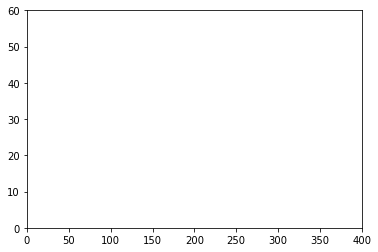

In [5]:
fig, ax = plt.subplots()

ax.set_xlim((0, 400))
ax.set_ylim((0, 60))

line, = ax.plot([], [], lw=2)

In [6]:
# Animation

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    t, a, p = map(np.array, zip(*result))

    line.set_data(t[:i], p[:i])
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=400, interval=10, blit=True)

In [7]:
HTML(anim.to_html5_video())